In [ ]:
import kagglehub

# Download latest version
dl_path = kagglehub.dataset_download("kk9969/retail-prices-of-commodities-in-india")

In [21]:
from pathlib import Path
path = Path(dl_path)

In [22]:
list(path.glob("*"))

[PosixPath('/Users/mateusz.dzitkowski/.cache/kagglehub/datasets/kk9969/retail-prices-of-commodities-in-india/versions/1/Monthly_Non_Food_Retail_Prices.csv'),
 PosixPath('/Users/mateusz.dzitkowski/.cache/kagglehub/datasets/kk9969/retail-prices-of-commodities-in-india/versions/1/Weekly_Food_Retail_Prices.csv'),
 PosixPath('/Users/mateusz.dzitkowski/.cache/kagglehub/datasets/kk9969/retail-prices-of-commodities-in-india/versions/1/Monthly_Food_Retail_Prices.csv'),
 PosixPath('/Users/mateusz.dzitkowski/.cache/kagglehub/datasets/kk9969/retail-prices-of-commodities-in-india/versions/1/Weekly_Non_Food_Retail_Prices.csv')]

In [56]:
import pandas as pd

df: pd.DataFrame = pd.read_csv(path / "Monthly_Food_Retail_Prices.csv").dropna()
df = df[df["Unit"] == "Kg."]
df["Date"] = pd.to_datetime(df["Date"], format="%b-%Y") + pd.offsets.MonthBegin()

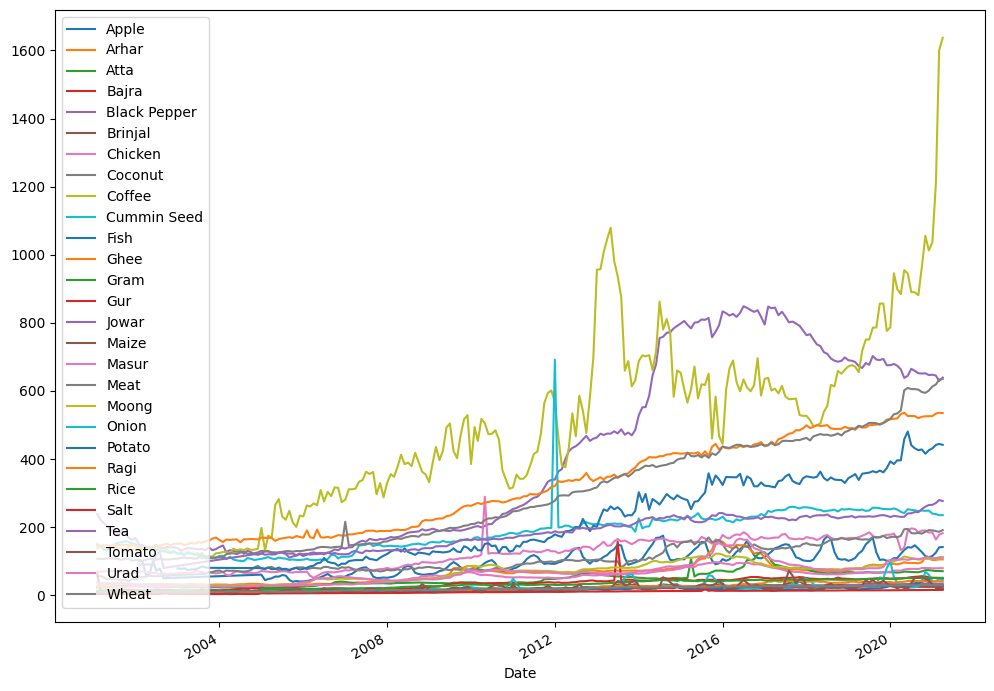

In [62]:
(
    df[["Date", "Commodity", "Retail Price"]]
    .groupby(["Date", "Commodity"])
    .mean()
    .reset_index()
    .set_index("Date")
    .groupby("Commodity")["Retail Price"]
    .plot(legend=True, figsize=(12, 9))
);

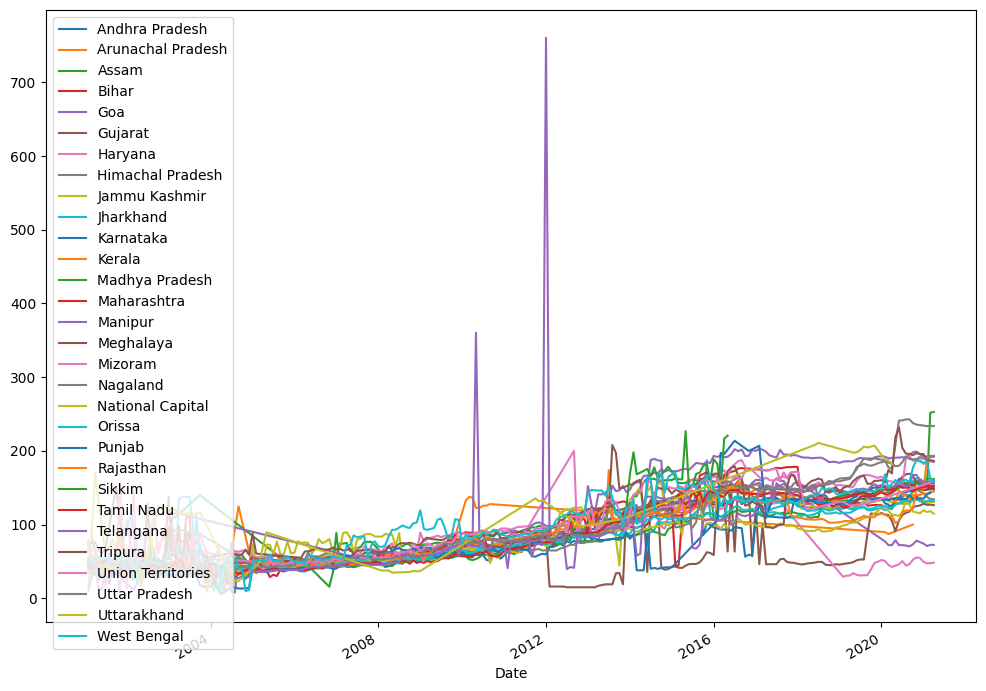

In [64]:
(
    df[["Date", "State", "Retail Price"]]
    .groupby(["Date", "State"])
    .mean()
    .reset_index()
    .set_index("Date")
    .groupby("State")["Retail Price"]
    .plot(legend=True, figsize=(12, 9))
);

In [60]:
(
    df[["State", "Retail Price"]]
    .groupby("State")
    .mean()
    .sort_values(by="Retail Price", ascending=False)
    .head()
)

,Retail Price
State,
Sikkim,170.789873
Manipur,149.953423
Uttarakhand,126.245450
Assam,123.827619
West Bengal,109.461379


In [61]:
(
    df[["State", "Retail Price"]]
    .groupby("State")
    .mean()
    .sort_values(by="Retail Price", ascending=True)
    .head()
)

,Retail Price
State,
Arunachal Pradesh,65.522228
Punjab,67.106500
Haryana,67.564816
Gujarat,69.736712
National Capital,69.901893
